# Word2Vec 을 이용한 추천시스템

---

# Word2Vec 이란?

### 다음과 같이 단어들의 One-Hot 인코딩을 각각의 feature들로 Embedding 하는 기술

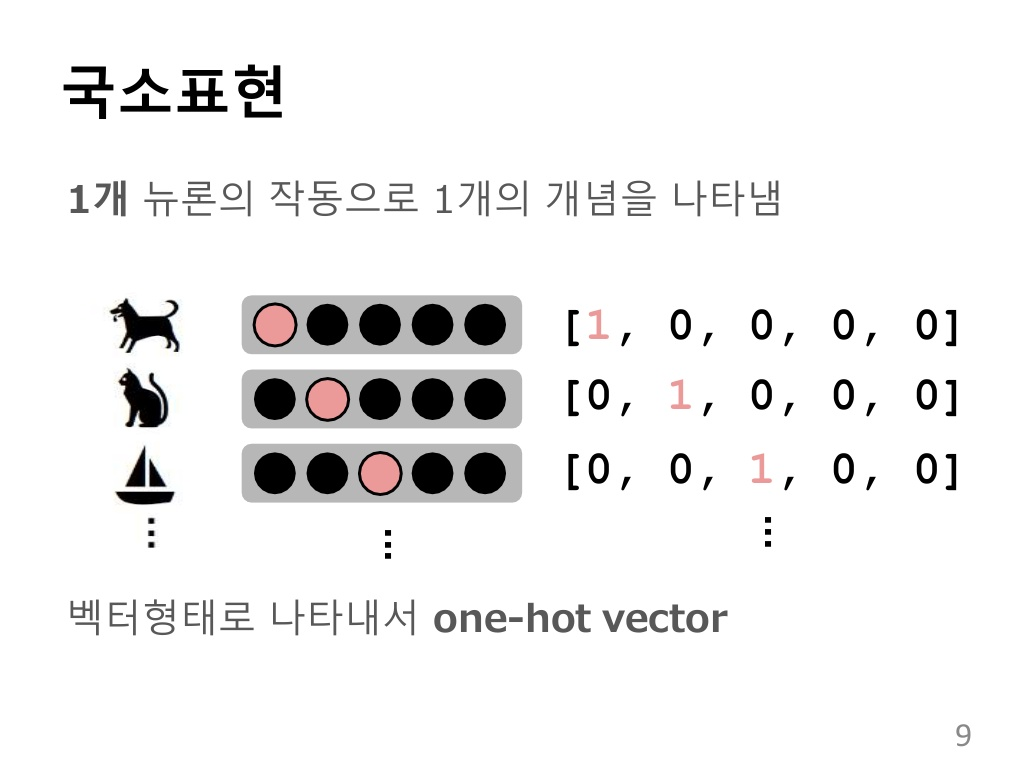

In [4]:
from IPython.display import Image
Image('images/국소표현.png')

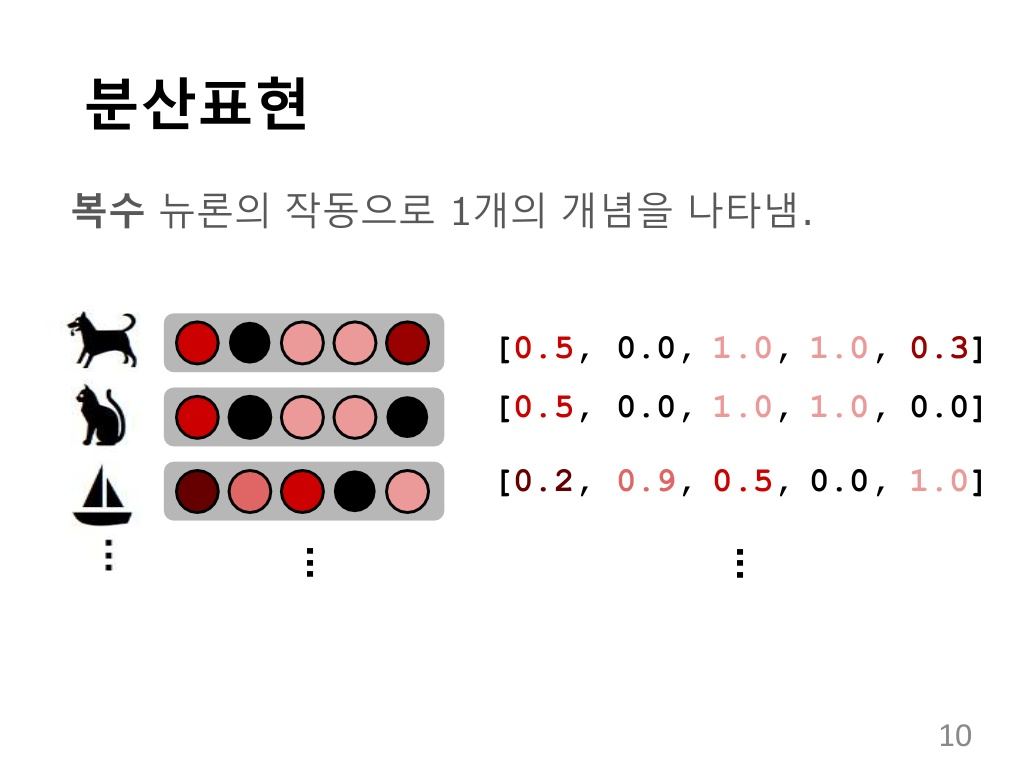

In [3]:
Image('images/분산표현.png')

# [Rajuten](https://www.slideshare.net/rakutentech/recommender-system-with-distributed-representation)社의  다음 슬라이드에서 상품추천에대한 힌트를 얻음

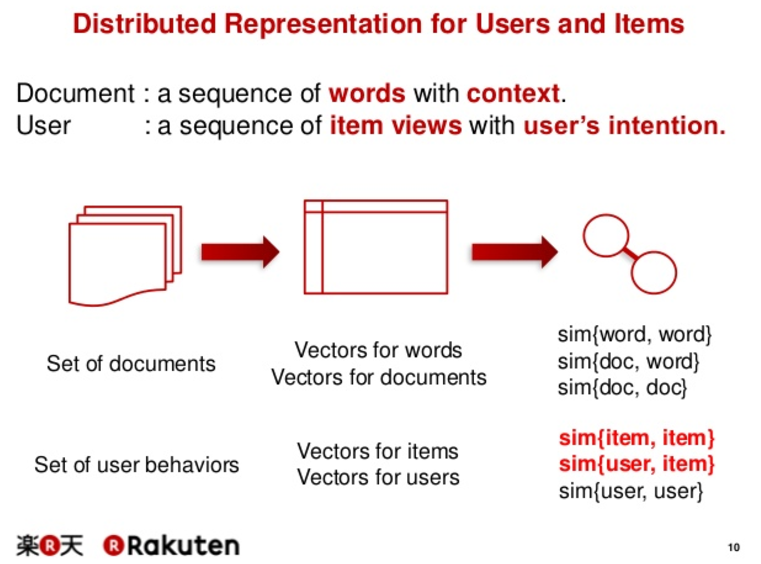

In [5]:
Image('images/rakuten1.PNG')

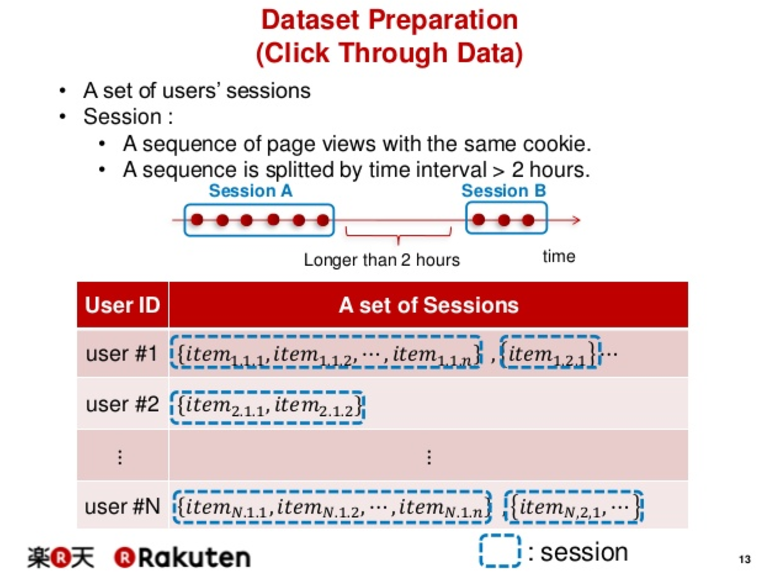

In [6]:
Image('images/rakuten2.PNG')

# W2V + Recommendation 의 구조

## 1. 상품을 각각의 단어로 생각하고 각 상품에대한 one-hot 인코딩을 통해 백터화 시킴
## 2. 후 embedding을 통해 차원을 축소 - (doc2vec)
## 3. similarity 를 통해 고객의 초이스에 대해 상품을 추천해주는 것

---

# 직접 해봅니다.

### 해당 데이터는 지난 L.point 상품추천 시스템 공모전의 데이터

* 2859303 건의 거래
* 4386 개의 아이템
* 19383 명의 고객

### 전처리

* Rakuten에서 1session이라고 표현한 묶음을 해당 데이터에서는 영수증 번호가 같은 품목을 묶음 (영수증상에 동시에 결제한 품목)
* 한번 결재했을 때 10건이하로 결제한 session은 제외
* random sampling을 통해 4000건의 training session과
* 1493의 test session을 분리
* 영수증상 상품 구매 결과를 상품 code로 대체 (T, F 에서 T에 상품코드를 대체)

In [10]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

In [11]:
train_data = read_data('train.txt')
test_data = read_data('test.txt')

In [12]:
train_data

[['010101 010103 010104 020103 030103 030301 030302 040103 040406 070101 130703 150101 150103 150403 150405 160204 160915 170147 170314 170701',
  '148'],
 ['010104 010110 030101 030108 030208 030505 030601 030603 030606 040203 050107 080304 100202 110101 110301 110501 140306 140310 150403 150405 170160',
  '811'],
 ['010110 010118 010502 010503 010506 030104 030204 030206 030303 030403 030601 030904 040304 050201 050302 050305 130712 140204 140208 140311',
  '1590'],
 ['010501 020101 020204 030802 030901 040302 070101 070103 070402 100407 110101 110204 120101 120601 140203 140407 140601 150101 150302 150403 150405',
  '2214'],
 ['030105 030301 030303 040304 060309 060504 070101 080201 100101 100203 110304 130101 130103 130108 130711 130712 130803 150301 150302 150306 150401 150403 150405 150604 150801 160406 170427',
  '3371'],
 ['010104 010117 010202 010206 010508 050111 050401 070402 090106 090201 120202 130103 140407 150103 150302 150306 150401 160101 160102 160602 160603 160604 16

In [13]:
# row, column의 수가 제대로 읽혔는지 확인
print(len(train_data))      # nrows: 150000
print(len(train_data[0]))   # ncols: 3
print(len(test_data))       # nrows: 50000
print(len(test_data[0]))     # ncols: 3

4000
2
1493
2


In [14]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

In [15]:
def tokenize(doc):
    # norm, stem은 optional
    return ["".join(t) for t in pos_tagger.morphs(doc)]

In [16]:
train_docs = [(tokenize(row[0]), row[1]) for row in train_data]
test_docs = [(tokenize(row[0]), row[1]) for row in test_data]

In [17]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

92638


In [10]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [18]:
import pandas as pd
import numpy as np

In [19]:
train_data_pd = pd.DataFrame(train_data)

# 해당 결과가 한 영수증(Session)당 구매한 Item 현황입니다

In [20]:
train_data_pd.head()

,0,1
0,010101 010103 010104 020103 030103 030301 0303...,148
1,010104 010110 030101 030108 030208 030505 0306...,811
2,010110 010118 010502 010503 010506 030104 0302...,1590
3,010501 020101 020204 030802 030901 040302 0701...,2214
4,030105 030301 030303 040304 060309 060504 0701...,3371


In [23]:
train_docs[0]

(['010101',
  '010103',
  '010104',
  '020103',
  '030103',
  '030301',
  '030302',
  '040103',
  '040406',
  '070101',
  '130703',
  '150101',
  '150103',
  '150403',
  '150405',
  '160204',
  '160915',
  '170147',
  '170314',
  '170701'],
 '148')

# Word2Vec을 이용한 추천

In [26]:
import gensim

In [24]:
# word2vec training
model = Word2Vec(sentances, window=5, min_count=5, size=100)

NameError: name 'Word2Vec' is not defined

In [18]:
print (model['010101'])

[  3.74143533e-02  -2.62941241e-01  -5.42480409e-01  -7.44301200e-01
  -7.98932239e-02   5.87405801e-01   3.37559760e-01  -5.76889992e-01
   4.05925989e-01  -9.35312033e-01  -2.06520334e-01  -1.42235467e-02
  -1.35100114e+00   2.24287082e-02  -8.81707311e-01  -1.27066737e-02
   7.49845088e-01  -9.76561546e-01  -9.58831906e-02  -1.14211905e+00
   5.73321916e-02  -3.63812864e-01  -2.44585727e-03  -1.05749488e+00
   1.88829526e-01   1.56595945e-01  -1.38785511e-01   2.54128218e-01
   4.70927596e-01   1.11875728e-01  -4.79937971e-01   8.36450279e-01
  -2.37237662e-01   3.54585826e-01   5.70560932e-01   1.57501996e-01
  -3.44287246e-01  -1.31246293e+00   5.89181716e-03  -1.26172423e+00
  -5.40531337e-01  -5.26224971e-01   1.09393485e-01  -1.41763464e-01
   3.36779088e-01   8.56146336e-01   1.15172601e+00   1.38866603e-01
   1.17594385e+00   1.06551218e+00  -8.54075253e-02   2.98351854e-01
  -1.53599635e-01   3.94975781e-01  -1.78589419e-01  -2.32645534e-02
   1.40476329e-02   7.62300074e-01

In [19]:
model.most_similar(positive=['010101'], topn=10)

[('010103', 0.9996364116668701),
 ('010118', 0.9955399036407471),
 ('010114', 0.9924812316894531),
 ('010116', 0.9916757345199585),
 ('010121', 0.991442859172821),
 ('010506', 0.9906233549118042),
 ('010402', 0.9889366626739502),
 ('010104', 0.9886896014213562),
 ('010115', 0.9883456826210022),
 ('010501', 0.9866728186607361)]

In [20]:
model.most_similar(positive=['010101','020103'], negative=['010103'], topn=10)

[('030102', 0.9985623359680176),
 ('030108', 0.9980763792991638),
 ('020202', 0.9977590441703796),
 ('020203', 0.9977558851242065),
 ('010206', 0.9977009296417236),
 ('020101', 0.9973504543304443),
 ('010212', 0.9963011741638184),
 ('010214', 0.9959595203399658),
 ('010209', 0.9954744577407837),
 ('010213', 0.9954416751861572)]

---

# Doc2Vec 을 이용한 추천

In [21]:
from gensim.models import doc2vec
import multiprocessing
from collections import namedtuple

In [22]:
cores = multiprocessing.cpu_count()

In [23]:
TaggedDocument = namedtuple('TaggedDocument', 'words tags')

In [116]:
# 여기서는 15만개 training documents 전부 사용함
tagged_train_docs = [TaggedDocument(d, [c]) for d, c in train_docs]
tagged_test_docs = [TaggedDocument(d, [c]) for d, c in test_docs]

In [117]:
tagged_train_docs

[TaggedDocument(words=['010101', '010103', '010104', '020103', '030103', '030301', '030302', '040103', '040406', '070101', '130703', '150101', '150103', '150403', '150405', '160204', '160915', '170147', '170314', '170701'], tags=['148']),
 TaggedDocument(words=['010104', '010110', '030101', '030108', '030208', '030505', '030601', '030603', '030606', '040203', '050107', '080304', '100202', '110101', '110301', '110501', '140306', '140310', '150403', '150405', '170160'], tags=['811']),
 TaggedDocument(words=['010110', '010118', '010502', '010503', '010506', '030104', '030204', '030206', '030303', '030403', '030601', '030904', '040304', '050201', '050302', '050305', '130712', '140204', '140208', '140311'], tags=['1590']),
 TaggedDocument(words=['010501', '020101', '020204', '030802', '030901', '040302', '070101', '070103', '070402', '100407', '110101', '110204', '120101', '120601', '140203', '140407', '140601', '150101', '150302', '150403', '150405'], tags=['2214']),
 TaggedDocument(words=

In [118]:
# 사전 구축
doc_vectorizer = doc2vec.Doc2Vec(
    dm=0,            # PV-DBOW / default 1
    dbow_words=1,    # w2v simultaneous with DBOW d2v / default 0
    window=8,        # distance between the predicted word and context words 
    size=100,        # vector size 
    alpha=0.025,     # learning-rate
    seed=1234,
    min_count=10,    # ignore with freq lower
    min_alpha=0.025, # min learning-rate
    workers=cores,   # multi cpu
    hs = 1,          # hierarchical softmax / default 0
#     negative = 8,   # negative sampling / default 5
    )

In [119]:
doc_vectorizer.build_vocab(tagged_train_docs)
print(str(doc_vectorizer))

Doc2Vec(dbow+w,d100,n5,hs,w8,mc10,s0.001,t24)


In [133]:
# To save
doc_vectorizer.save('Doc2Vec(dbow+w,d100,n5,hs,w8,mc10,s0.001,t24).model')

In [108]:
# load
doc_vectorizer = doc2vec.Doc2Vec.load('Doc2Vec(dbow+w,d100,n5,hs,w8,mc10,s0.001,t24).model')
print(str(doc_vectorizer))

In [120]:
for epoch in range(50):
    %time doc_vectorizer.train(tagged_train_docs)
    doc_vectorizer.alpha -= 0.0004  # decrease the learning rate
    doc_vectorizer.min_alpha = doc_vectorizer.alpha  # fix the learning rate, no decay
    print(epoch)

CPU times: user 16 s, sys: 668 ms, total: 16.7 s
Wall time: 3.04 s
CPU times: user 15.7 s, sys: 674 ms, total: 16.4 s
Wall time: 2.94 s
CPU times: user 15.8 s, sys: 623 ms, total: 16.4 s
Wall time: 2.9 s
CPU times: user 15.7 s, sys: 641 ms, total: 16.3 s
Wall time: 2.9 s
CPU times: user 15.6 s, sys: 699 ms, total: 16.3 s
Wall time: 2.92 s
CPU times: user 15.7 s, sys: 647 ms, total: 16.4 s
Wall time: 2.93 s
CPU times: user 15.7 s, sys: 653 ms, total: 16.3 s
Wall time: 2.91 s
CPU times: user 15.6 s, sys: 687 ms, total: 16.3 s
Wall time: 2.92 s
CPU times: user 16 s, sys: 665 ms, total: 16.6 s
Wall time: 2.94 s
CPU times: user 16 s, sys: 669 ms, total: 16.7 s
Wall time: 2.93 s
CPU times: user 15.9 s, sys: 661 ms, total: 16.6 s
Wall time: 2.89 s
CPU times: user 15.6 s, sys: 664 ms, total: 16.3 s
Wall time: 2.91 s
CPU times: user 15.7 s, sys: 644 ms, total: 16.4 s
Wall time: 2.92 s
CPU times: user 15.7 s, sys: 655 ms, total: 16.3 s
Wall time: 2.9 s
CPU times: user 15.7 s, sys: 643 ms, total:

# Word2Vec vs. Doc2Vec

### 각 상품 고드를 상품명으로 대체하였습니다.

In [121]:
data_label = read_data('data_label.txt')
data_label_pd = pd.DataFrame(data_label)

In [122]:
data_label_pd.columns = ["item", "class", "label"]

### 987개의 상품 분류과 상품 명

In [123]:
data_label_pd

,item,class,label
0,010101,국산과일,사과
1,010102,국산과일,배
2,010103,국산과일,감
3,010104,국산과일,귤류
4,010105,국산과일,유자/모과
5,010106,국산과일,복숭아
6,010107,국산과일,자두
7,010108,국산과일,살구
8,010109,국산과일,매실
9,010110,국산과일,딸기


# 사과를 산 사람들에게 다은 물건을 추천을 해준다면 ? (상위 10개)

In [126]:
w2v_top10 = model.most_similar(positive=['010101'], topn=10)
d2v_top10 = doc_vectorizer.most_similar('010101')

In [127]:
w2v_top10_pd = pd.DataFrame(w2v_top10)
d2v_top10_pd = pd.DataFrame(d2v_top10)

In [128]:
w2v_top10_pd.columns = ["item", "score"]
d2v_top10_pd.columns = ["item", "score"]

In [129]:
d2v_top10_pd

,item,score
0,010104,0.838271
1,010103,0.835647
2,010116,0.827552
3,010114,0.807790
4,030102,0.806585
5,010206,0.803699
6,020103,0.798733
7,010117,0.797173
8,020101,0.790980
9,030104,0.790699


---

In [130]:
w2v_top10_pd_label = w2v_top10_pd.merge(data_label_pd, on="item")
d2v_top10_pd_label = d2v_top10_pd.merge(data_label_pd, on="item")

### Word2Vec + 상품정보

In [131]:
w2v_top10_pd_label

,item,score,class,label
0,010103,0.999636,국산과일,감
1,010118,0.995540,국산과일,기타국산과일류
2,010114,0.992481,국산과일,참외
3,010116,0.991676,국산과일,토마토
4,010121,0.991443,국산과일,혼합과일선물세트
5,010506,0.990623,견과류,아몬드
6,010402,0.988937,건과일,기타건과일
7,010104,0.988690,국산과일,귤류
8,010115,0.988346,국산과일,메론
9,010501,0.986673,견과류,밤


### Doc2Vec  + 상품정보

In [132]:
d2v_top10_pd_label

,item,score,class,label
0,010104,0.838271,국산과일,귤류
1,010103,0.835647,국산과일,감
2,010116,0.827552,국산과일,토마토
3,010114,0.807790,국산과일,참외
4,030102,0.806585,엽채류,부추
5,010206,0.803699,수입과일,바나나
6,020103,0.798733,양곡,즉석도정미
7,010117,0.797173,국산과일,방울토마토
8,020101,0.790980,양곡,일반미
9,030104,0.790699,엽채류,시금치


### Word2Vec과 Doc2Vec이 크게 달라보이지 않지만 Doc2Vec이 다양성을 보인다 

---

# Evealuation (진행중)

In [37]:
train_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_train_docs]
train_y = [doc.tags[0] for doc in tagged_train_docs]
len(train_x)  # 사실 이 때문에 앞의 term existance와는 공평한 비교는 아닐 수 있다

4000

In [41]:
train_x_np = np.asarray(train_x)
train_x_np = np.asarray(train_y, dtype=int)

train_x_np[:5, :5]

array([[-0.03077478, -0.13611408,  0.32942531,  0.31357148, -0.07902885],
       [ 0.22759627, -0.23245305,  0.29899079,  0.04552746,  0.48829776],
       [ 0.06852622, -0.42546809,  0.44004807,  0.46285215, -0.81275755],
       [-0.42309406, -0.43237102, -0.24697138, -0.26646101,  0.14427826],
       [ 0.51295346, -0.30431062, -0.02903226,  0.2869482 , -0.03486621]], dtype=float32)

In [42]:
test_x = [doc_vectorizer.infer_vector(doc.words) for doc in tagged_test_docs]
test_y = [doc.tags[0] for doc in tagged_test_docs]
len(test_x)

1493

In [43]:
test_x_np = np.asarray(test_x)
test_y_np = np.asarray(test_y, dtype=int)

test_x_np[:5, :5]